In [87]:
import numpy as np
def piecewise_noise(f, n0, exp=[0], fc=[0]):
    """Piecewise noise specified corner frequencies and exponents

    Parameters
    ----------
        f: list of int/float or numpy.ndarray or int/float
            The frequency axis of the noise. Or, the frequency at which the
            noise is evaluated.
        n0: int/float
            The noise level at 1 Hz with the first exponent.
        exp: list of int/float
            The list of exponents of each section of noise separated by the \
            corner frequencies.
        fc: list of int/float
            The list of corner frequencies in increaing order. The length of \
            fc must be 1 less then the length of exp

    Returns
    -------
        noise: numpy.ndarray
            The piecewise noise array.
    """

    list(fc)
    if fc[-1] < np.inf:
        fc.append(np.inf)

    noise = np.zeros_like(f)
    fc_index = 0
    for i in range(len(f)):
        if f[i] >= fc[fc_index]:
            fc_index += 1
            n0 = n0 * fc[fc_index-1]**(exp[fc_index-1]-exp[fc_index])
        noise[i] = n0 * f[i]**exp[fc_index]
        # print(fc_index)
    return(np.array(noise))

def lvdt_noise(f, n0, fc):
    """LVDT noise

    Parameters
    ----------
        f: list of int/float or numpy.ndarray
            The frequency axis of the noise.
        n0: int/float
            The noise level at 1 Hz with the exponent of -0.5.
        fc: int/float
            The corner frequency at which the exponent changes from -0.5 to 0.
    Returns
    -------
        noise: numpy.ndarray
            The piecewise noise array.

    Notes
    -----
        The LVDT noise noise typically has a :math:`f^{-0.5}` dependency \
        before the corner frequency and is flat after that.
    """

    return(piecewise_noise(f, n0, exp=[-0.5, 0], fc=[fc]))
from scipy.optimize import minimize
from inspect import signature
def noise_fit(noise_model, f, noise_data, weight=None, x0=None, **kwargs):
    """Noise model fit, follow the argument format of scipy.optimize.curve_fit

    Parameters
    ----------

    """
    if weight is None:
        weight = np.ones_like(noise_data)
    if x0 is None:
        no_of_params = str(signature(noise_model)).count(',')
        x0 = np.ones(no_of_params)
    def cost(args):
        return(sum(np.sqrt((noise_model(f, *args)/noise_data - np.ones_like(noise_data))**2)*weight))
    res = minimize(cost, x0, **kwargs, options={'disp':True}, method='Nelder-Mead')
    return(res.x)

In [94]:
args = noise_fit(lvdt_noise, f, geophone_noise(f,1e-5,1))

NameError: name 'geophone_noise' is not defined

In [89]:
a

array([1.00000195e-05, 1.00000389e+00])

In [32]:
from inspect import signature
para=str(signature(lvdt_noise)).count(',')
np.ones(para)

array([1., 1.])

In [37]:
sum((np.array([1,2,3])-np.array([2,3,3.1]))**2)

2.0100000000000002

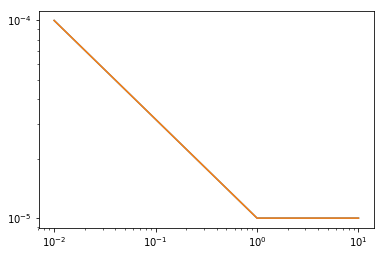

In [93]:
import matplotlib.pyplot as plt
f = np.linspace(0.01,10,1000)
# lvdt_noise = piecewise_noise(f, 1e-6, exp=[-0.5, 0, 1, -3], fc=[0.1,1,2])

plt.loglog(f, lvdt_noise(f, *args))
plt.loglog(f, lvdt_noise(f,1e-5,1))
# plt.loglog(f,nn(f))

In [3]:
lvdt_noise

<function __main__.lvdt_noise(f, n0, fc)>

In [97]:
data=np.loadtxt('BS_IP_noise.txt')
f, seisl, seist, lvdtl, lvdtt, geol, geot = data[:,0],data[:,1],data[:,2],data[:,3],data[:,4],data[:,5],data[:,6]
mask = f>1e-2
f=f[mask]
seisl=seisl[mask]
seist=seist[mask]
lvdtl=lvdtl[mask]
lvdtt=lvdtt[mask]
geol=geol[mask]
geot=geot[mask]
weight = np.ones_like(f)
for i in range(len(f)):
    if f[i]>0.04 and f[i]<0.5:
        weight[i]=0

In [98]:
args=noise_fit(lvdt_noise, f, lvdtl)

Optimization terminated successfully.
         Current function value: 4361.257803
         Iterations: 102
         Function evaluations: 195


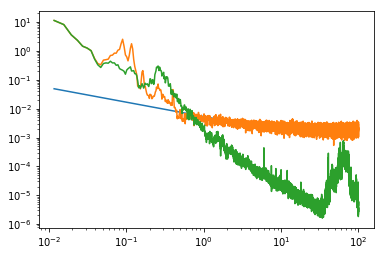

In [102]:
plt.loglog(f, lvdt_noise(f, *args))
plt.loglog(f, lvdtl)
plt.loglog(f, seisl)

In [104]:
P_num = [[],[]]
P_den = [[],[]]
P_num[0][0]=1
P_num[0][1]=2
P_num

IndexError: list assignment index out of range

NameError: name 'wL' is not defined